Welcome to the analytical notebook for predicting the price of backpacks. The dataset provides a rich blend of categorical and numerical attributes, including brand, material, style, and weight capacity. Our goal is to explore the dataset thoroughly, identify key trends and insights, and prepare it for building a robust machine learning model. 

Through exploratory data analysis (EDA), we aim to understand the underlying patterns in the data, identify relationships between features, and preprocess the dataset for optimal modeling performance. The final objective is to develop an accurate model to predict backpack prices while gaining actionable insights into the factors influencing pricing.


#### Key Insights

1. **Categorical Features Play a Vital Role**:
   - Features like `Brand`, `Material`, and `Style` show diverse distributions and are likely significant predictors of `Price`.
   - Neutral colors such as Gray, Black, and Blue dominate, indicating a preference for versatile designs.

2. **Numerical Features Have Limited Impact**:
   - Features such as `Compartments` and `Weight Capacity (kg)` exhibit low correlations with `Price`, implying minimal linear influence.

3. **No Strong Outliers**:
   - The `Price` distribution is relatively uniform, with no significant outliers, ensuring a clean dataset for modeling.

4. **Minimal Linear Relationships**:
   - The low correlation between numerical features and `Price` suggests the need for nonlinear models capable of capturing complex interactions.

5. **Missing Data is Manageable**:
   - Categorical columns like `Brand` and `Material` had missing values filled with the mode, while numerical features like `Weight Capacity (kg)` were imputed with the median.


#### Step 1: Import Necessary Libraries
Before we start, let's import the essential libraries.

In [1]:
# !pip install wordcloud --quiet

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import skew, kurtosis
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from xgboost import XGBRegressor

# Display settings
sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)  # Show all columns in DataFrame outputs

#### Step 2: Load the Data
We'll read the dataset and check its structure.

In [3]:
# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Display the first few rows
train_df.head()

id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           7.0                Yes   
1   1      Jansport   Canvas   Small          10.0                Yes   
2   2  Under Armour  Leather   Small           2.0                Yes   
3   3          Nike    Nylon   Small           8.0                Yes   
4   4        Adidas   Canvas  Medium           1.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  
0         No       Tote  Black             11.611723  112.15875  
1        Yes  Messenger  Green             27.078537   68.88056  
2         No  Messenger    Red             16.643760   39.17320  
3         No  Messenger  Green             12.937220   80.60793  
4        Yes  Messenger  Green             17.749338   86.02312

#### Step 3: Understand the Dataset
Let's check for missing values, data types, and a basic summary.

In [4]:
# Check basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [8]:
# Get statistical summary of numerical columns
train_df.describe()

id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.000000         299862.000000  300000.000000
mean   149999.500000       5.443590             18.029994      81.411107
std     86602.684716       2.890766              6.966914      39.039340
min         0.000000       1.000000              5.000000      15.000000
25%     74999.750000       3.000000             12.097867      47.384620
50%    149999.500000       5.000000             18.068614      80.956120
75%    224999.250000       8.000000             24.002375     115.018160
max    299999.000000      10.000000             30.000000     150.000000

#### Dataset Overview
The dataset consists of 300,000 rows and 11 columns, aimed at predicting the price of backpacks based on their attributes. 

##### Features:
- ##### **Target Variable**: Price (continuous numeric variable)
- ##### **Categorical Features**: Brand, Material, Size, Style, Color, Laptop Compartment, Waterproof
- ##### **Numerical Features**: Compartments, Weight Capacity (kg)

##### Key Findings:
- Significant missing values are observed in categorical columns like Brand, Material, Size, and Color.
- Preprocessing and encoding are required to handle categorical data and missing values.

#### Step 4: Handling missing values

In [5]:
# Check for missing values
train_df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [6]:
# Check missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Brand                   9705
Material                8347
Size                    6595
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
dtype: int64

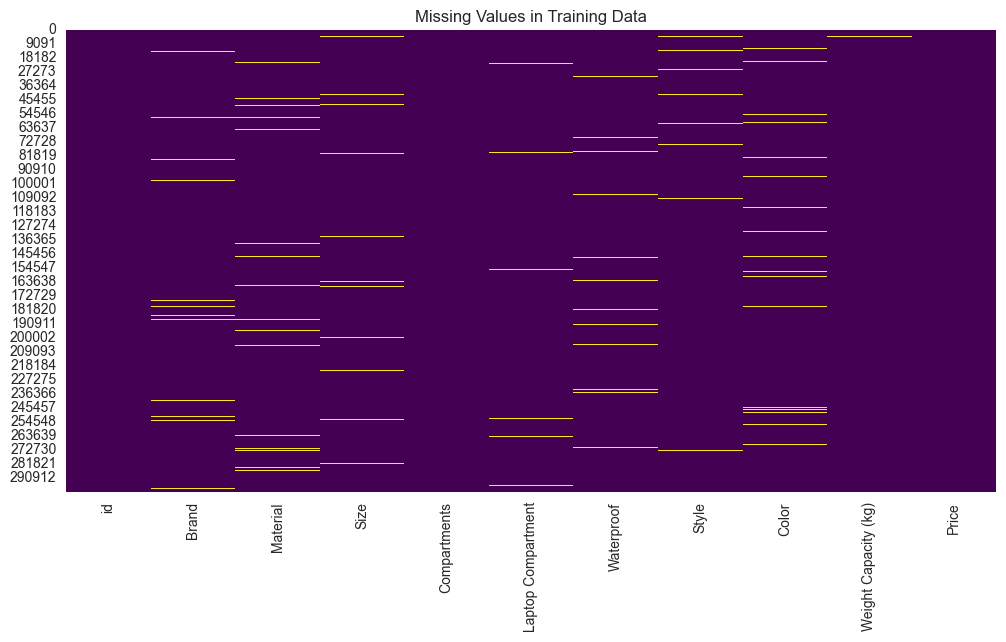

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

Handling Missing Values: We will fill categorical columns with the most frequent value (mode) and numerical columns with the median.

In [9]:
# Fill missing categorical values with mode
categorical_cols = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Fill missing numerical values with median
numerical_cols = ["Compartments", "Weight Capacity (kg)"]
for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

In [10]:
# Check missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [11]:
# Check missing values
missing_values = test_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

#### Missing Value Analysis
##### Observations:
- **Visualization of Missing Data**: A heatmap shows a non-uniform distribution of missing values.
  - Categorical columns such as Brand and Color have the most missing values.
  - Numerical columns like Weight Capacity (kg) have minimal missing data.

##### Handling Approach:
- Categorical columns were filled with the **mode**.
- Numerical columns were filled with the **median**.


In [12]:
# Get statistical summary of numerical columns
train_df.describe()

id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.000000         300000.000000  300000.000000
mean   149999.500000       5.443590             18.030012      81.411107
std     86602.684716       2.890766              6.965312      39.039340
min         0.000000       1.000000              5.000000      15.000000
25%     74999.750000       3.000000             12.099086      47.384620
50%    149999.500000       5.000000             18.068614      80.956120
75%    224999.250000       8.000000             24.001145     115.018160
max    299999.000000      10.000000             30.000000     150.000000

##### Observations:
- Price ranges from 15 to 150.
- Compartments vary from 1 to 10.
- Weight Capacity ranges from 5 to 30 kg.

In [13]:
# Checking skewness
print(f"Skewness of Price: {skew(train_df['Price'])}")
print(f"Kurtosis of Price: {kurtosis(train_df['Price'])}")

Skewness of Price: 0.03688257071706728
Kurtosis of Price: -1.192733547635976


#### Step 4: Visualizing Target Variable (Price)
#### 4.1 Target Variable (Price) Distribution

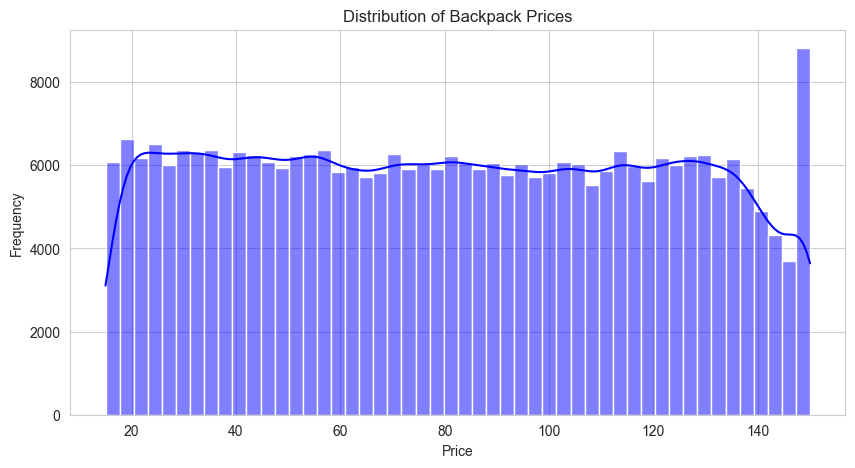

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Price"], bins=50, kde=True, color="blue")
plt.title("Distribution of Backpack Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### 4.2 Boxplot for Price (Detecting Outliers)

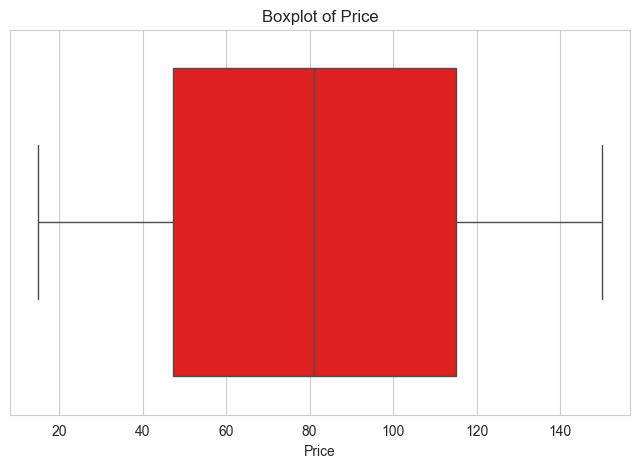

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["Price"], color="red")
plt.title("Boxplot of Price")
plt.show()

#### 4.3 Brand Popularity

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\4135731723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df["Brand"], order=train_df["Brand"].value_counts().index, palette="coolwarm")


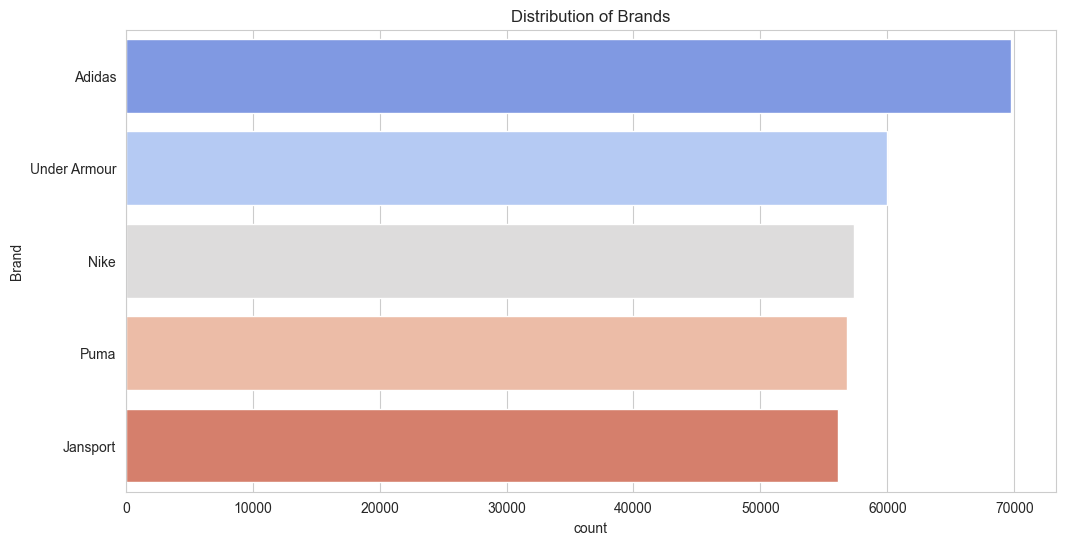

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df["Brand"], order=train_df["Brand"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Brands")
plt.show()

#### 4.4 Material Distribution

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\3060870222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Material"], order=train_df["Material"].value_counts().index, palette="viridis")


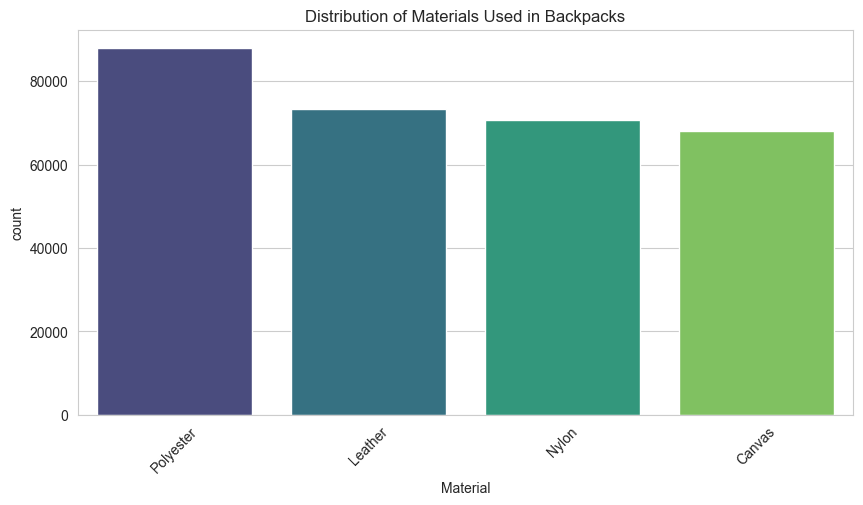

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df["Material"], order=train_df["Material"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Materials Used in Backpacks")
plt.show()

#### 4.5 Backpack Styles

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\549242937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Style"], order=train_df["Style"].value_counts().index, palette="magma")


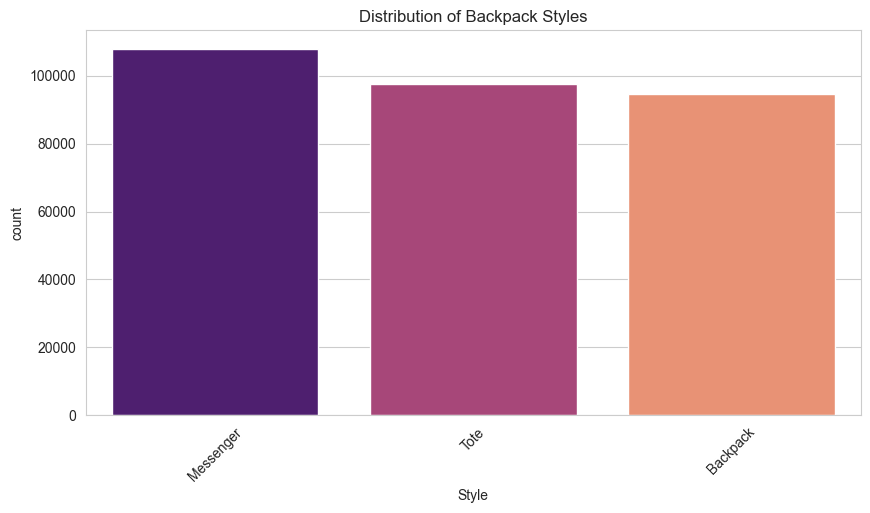

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df["Style"], order=train_df["Style"].value_counts().index, palette="magma")
plt.title("Distribution of Backpack Styles")
plt.xticks(rotation=45)
plt.show()

#### 4.6 WordCloud for Colors

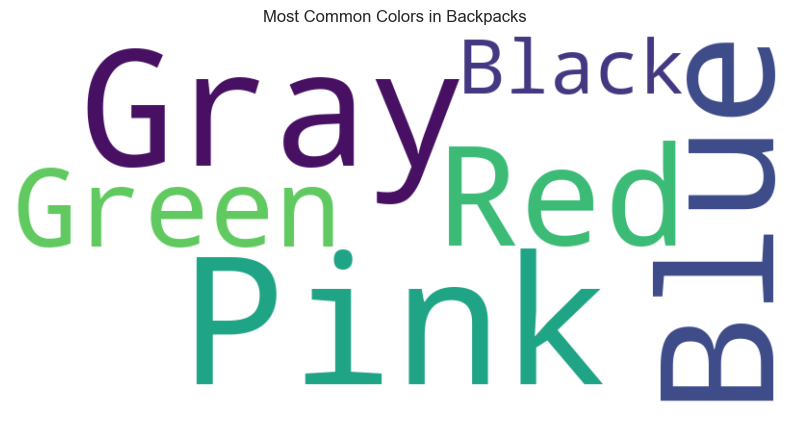

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(train_df["Color"].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Colors in Backpacks")
plt.show()

#### Univariate Analysis
##### Target Variable: Price
- **Price Distribution**:
  - Histogram reveals a near-uniform distribution with a slight density increase near higher prices (~150).
  - The boxplot indicates an interquartile range (IQR) between 60 and 100, with minimal outliers.

##### Categorical Variables
- **Brand**:
  - Adidas dominates, followed by Under Armour, Nike, Puma, and Jansport.
- **Material**:
  - Polyester is the most common, followed by Leather, Nylon, and Canvas, showing a preference for durable materials.
- **Style**:
  - Messenger bags are slightly more common than Tote and Backpack styles.
- **Color**:
  - Gray, Black, and Blue are the most frequent colors, reflecting consumer preference for neutral and versatile tones.

##### Numerical Variables
- **Compartments**:
  - Uniformly distributed between 1 and 10, aligning with typical backpack designs.
- **Weight Capacity (kg)**:
  - Ranges from 5 to 30 kg, with most values clustered in the middle range.

#### 5. Feature Relationships

#### 5.1 Correlation Matrix

In [20]:
# Compute correlations between numerical features and the target variable
correlation_matrix = train_df[numerical_cols].corr()
correlation_matrix

Compartments  Weight Capacity (kg)
Compartments               1.00000               0.00254
Weight Capacity (kg)       0.00254               1.00000

#### 5.2 Correlation Heatmap

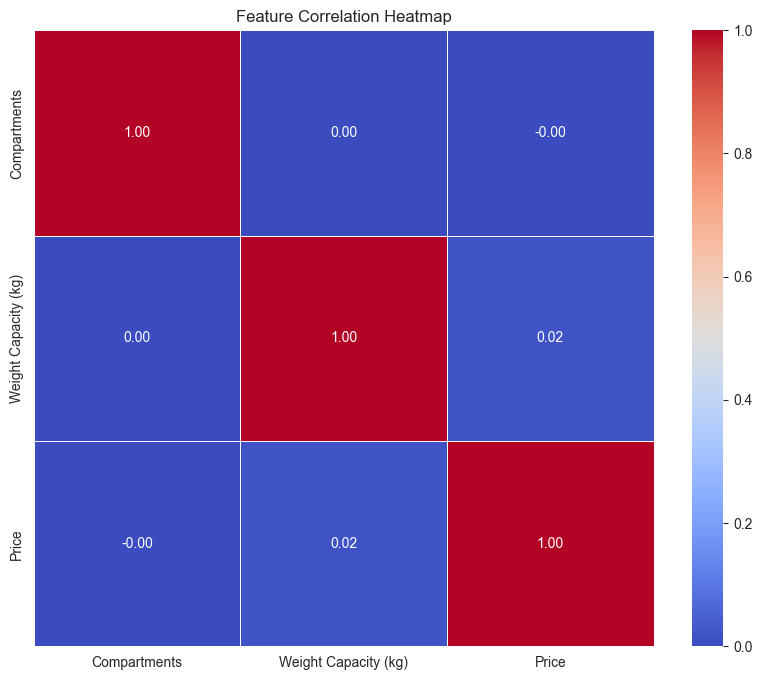

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[["Compartments", "Weight Capacity (kg)","Price"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 5.3 Relationship Between Categorical Features and Price

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


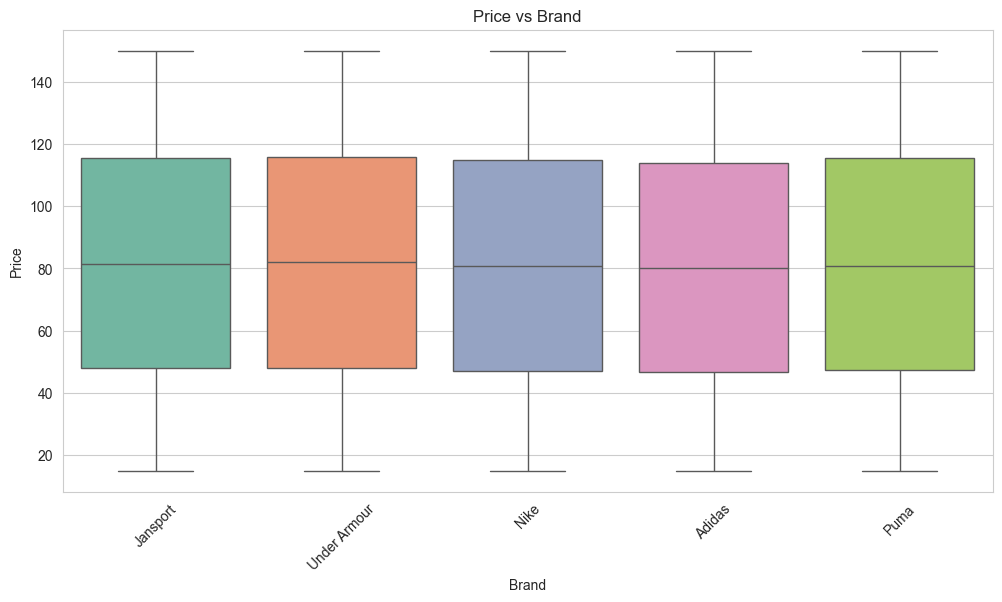

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


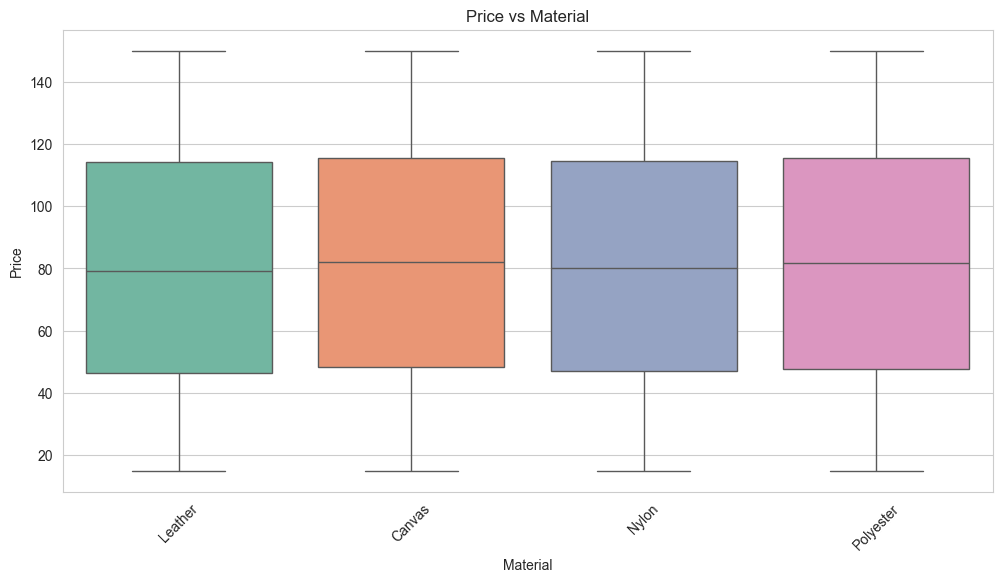

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


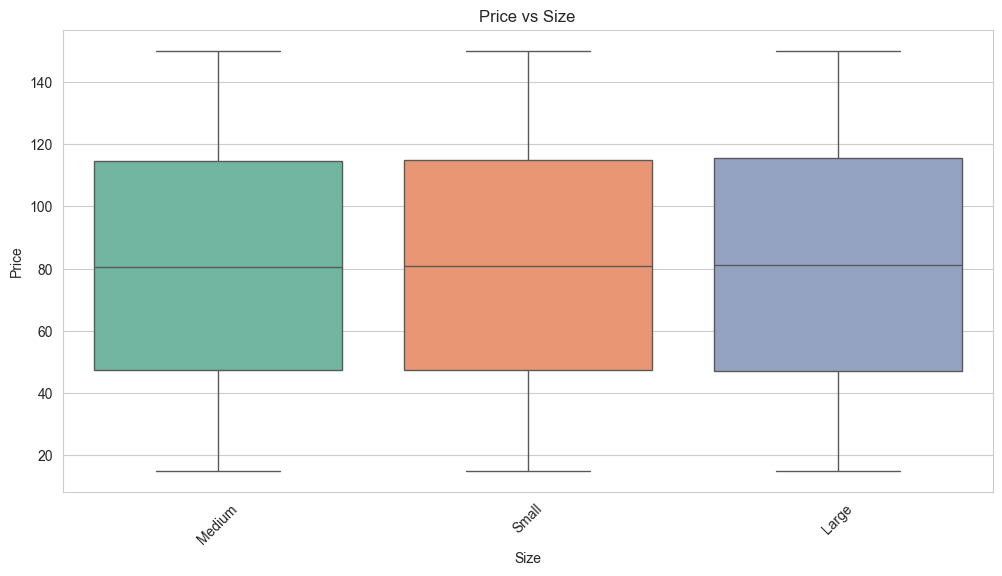

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


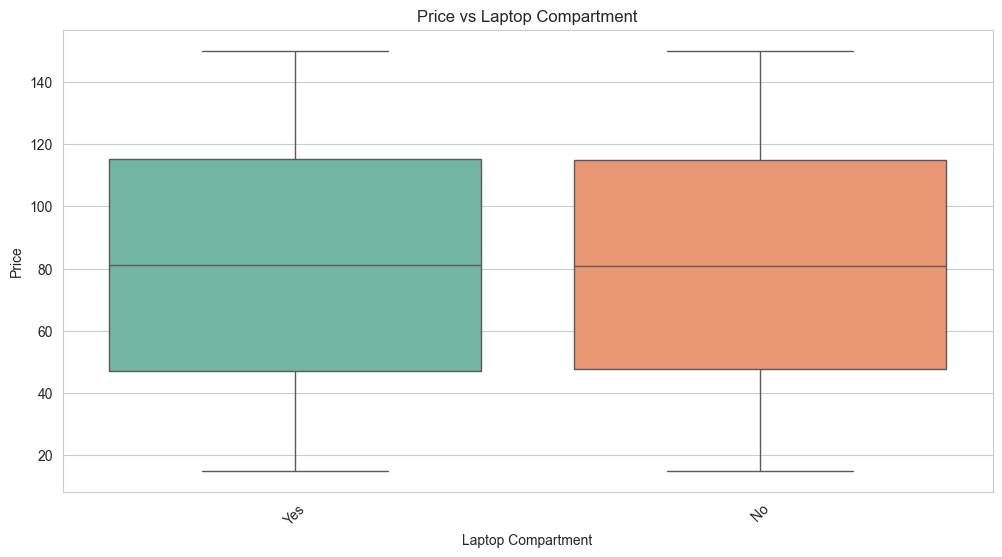

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


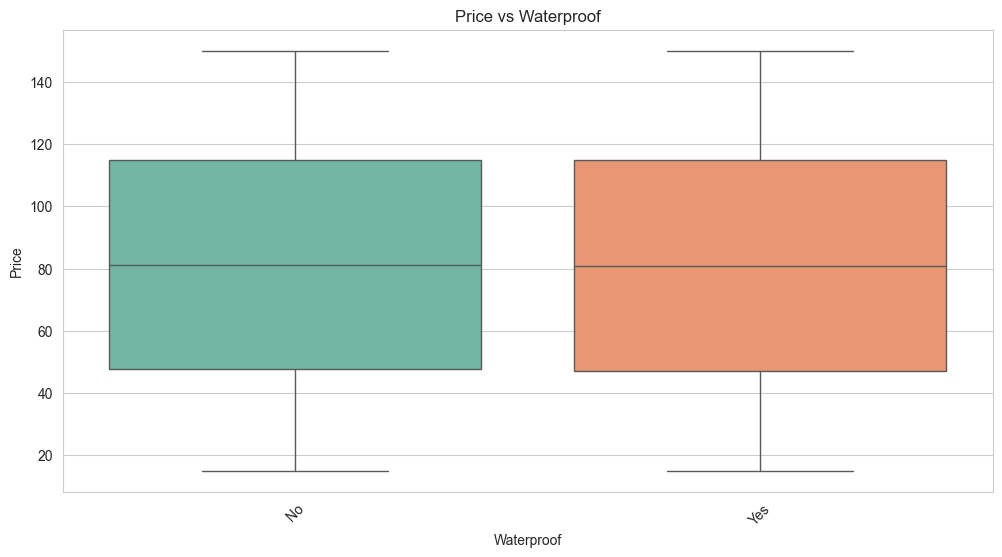

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


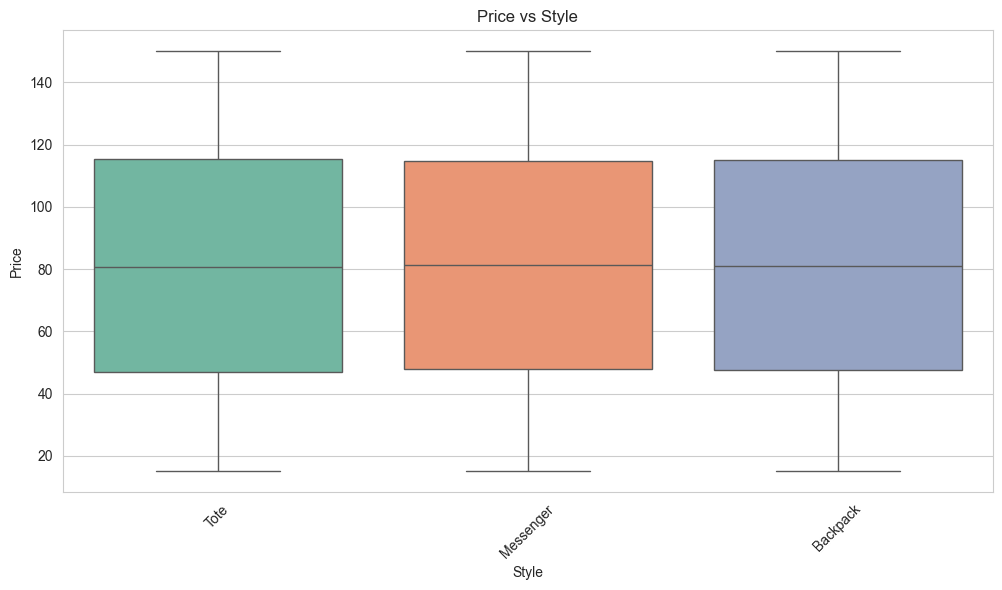

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\1502120367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')


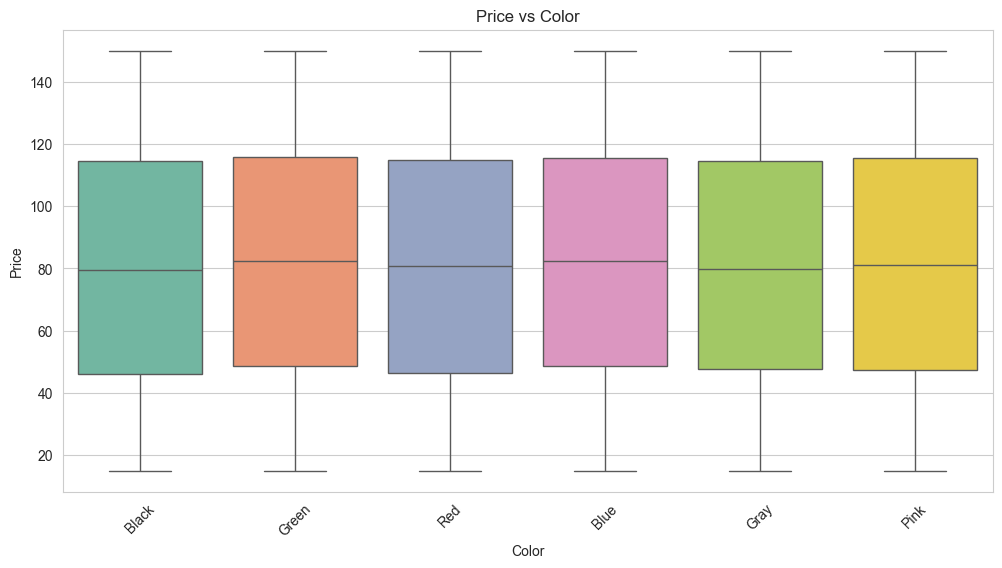

In [22]:
# Plot relationships between categorical features and the target variable
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_df, x=col, y='Price', palette='Set2')
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

#### 5.4 Pairplot for Key Numerical Features

In [23]:
# List of numerical columns
numerical_cols = ['Compartments', 'Weight Capacity (kg)']

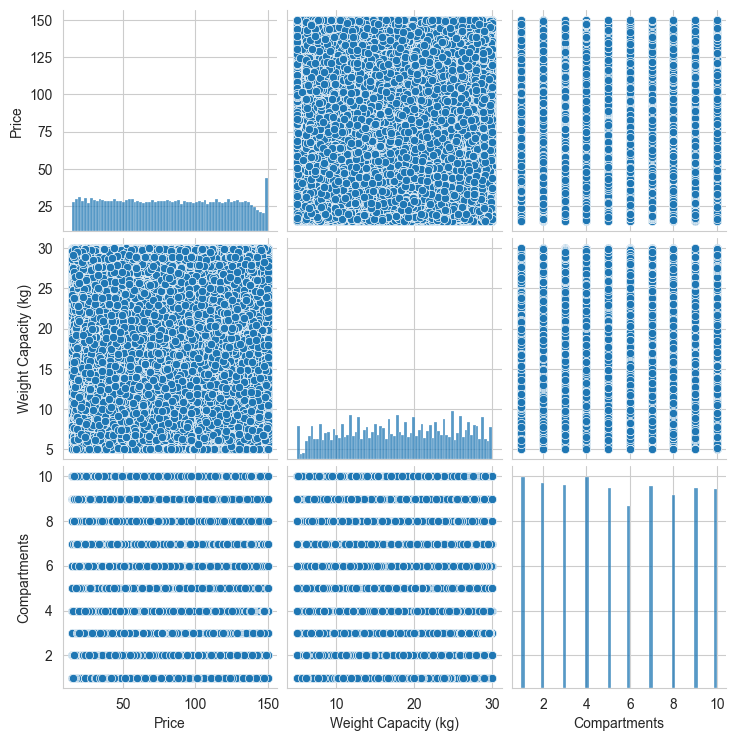

In [24]:
sns.pairplot(train_df[["Price", "Weight Capacity (kg)", "Compartments"]])
plt.show()

#### 5.5 Price vs. Weight Capacity

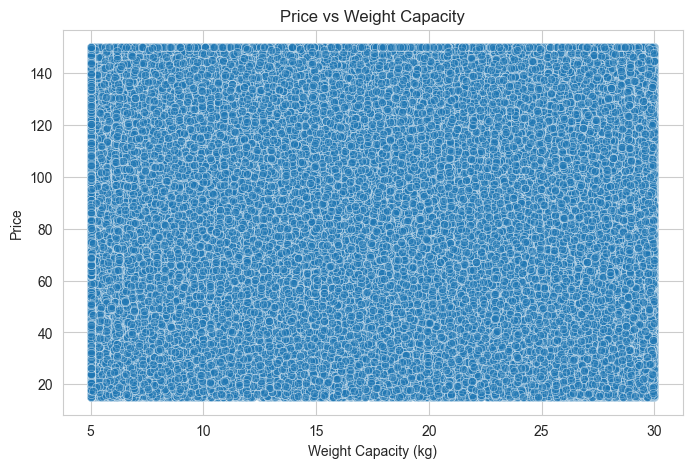

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df["Weight Capacity (kg)"], y=train_df["Price"], alpha=0.5)
plt.title("Price vs Weight Capacity")
plt.show()

#### 5.6 Price vs. Compartments

C:\Users\Hi\AppData\Local\Temp\ipykernel_22668\201892164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df["Compartments"], y=train_df["Price"], palette="Blues")


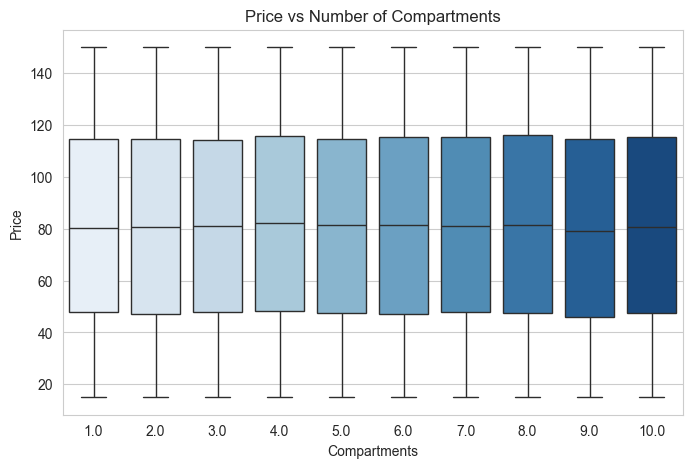

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["Compartments"], y=train_df["Price"], palette="Blues")
plt.title("Price vs Number of Compartments")
plt.show()

#### 5.7 Distribution of Numerical Featuresn

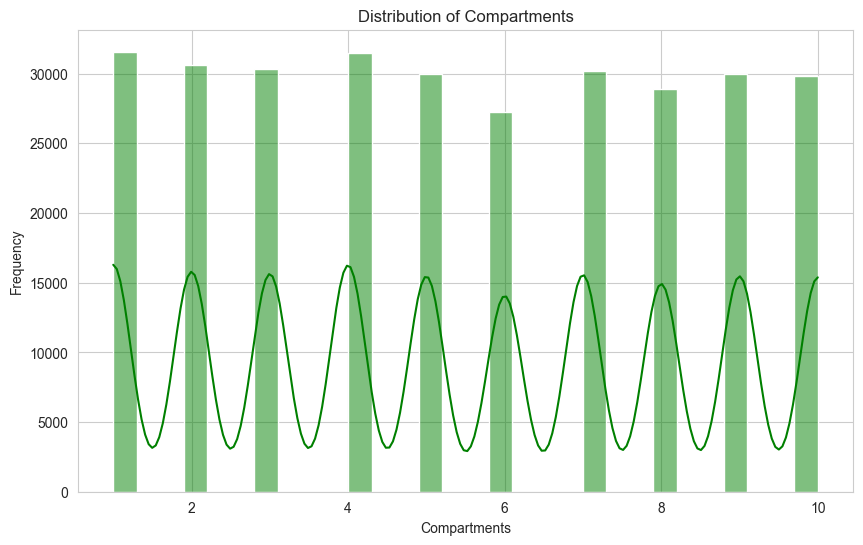

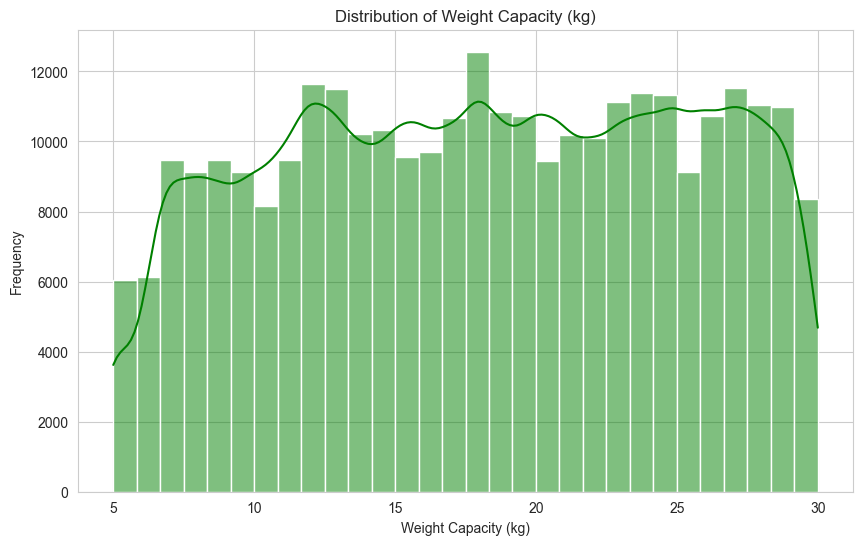

In [27]:
# Plot distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### 5.8 Boxplots for Numerical Featuresn

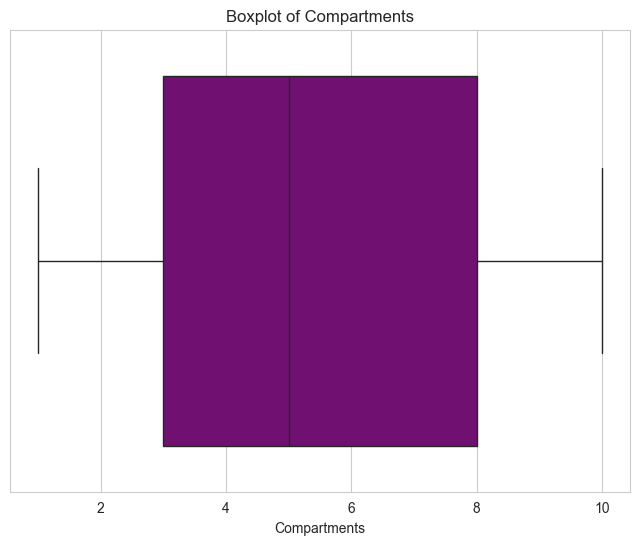

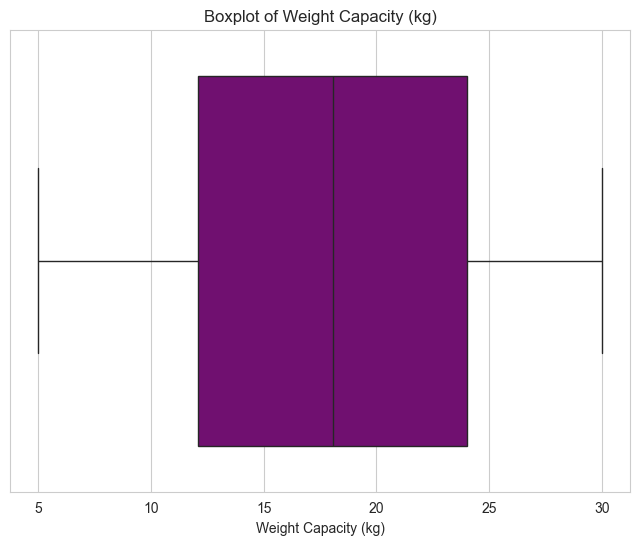

In [28]:
# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### Bivariate Analysis
##### Correlation Heatmap
- Numerical features (Compartments, Weight Capacity) show low correlation with Price, suggesting limited linear relationships.
- Categorical variables may play a larger role in determining Price.

##### Price vs. Categorical Features
- **Brand**:
  - Similar price distributions across all brands, with Adidas showing slightly higher medians.
- **Material**:
  - Leather and Polyester backpacks exhibit slightly higher price medians.
- **Style**:
  - Price distributions are nearly identical across styles (Messenger, Tote, Backpack).
- **Size**:
  - Larger backpacks have marginally higher median prices.
- **Laptop Compartment**:
  - Minimal price difference between backpacks with and without laptop compartments.
- **Waterproof**:
  - Similar price distributions for waterproof and non-waterproof backpacks.

##### Price vs. Numerical Features
- **Compartments**:
  - Boxplots reveal no strong relationship between Compartments and Price.
- **Weight Capacity**:
  - Scatter plots show no discernible trend between Weight Capacity and Price.


#### 6. Encoding Categorical Features

In [29]:
# Encode categorical features
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

#### 6.1 Paiplot after encoding

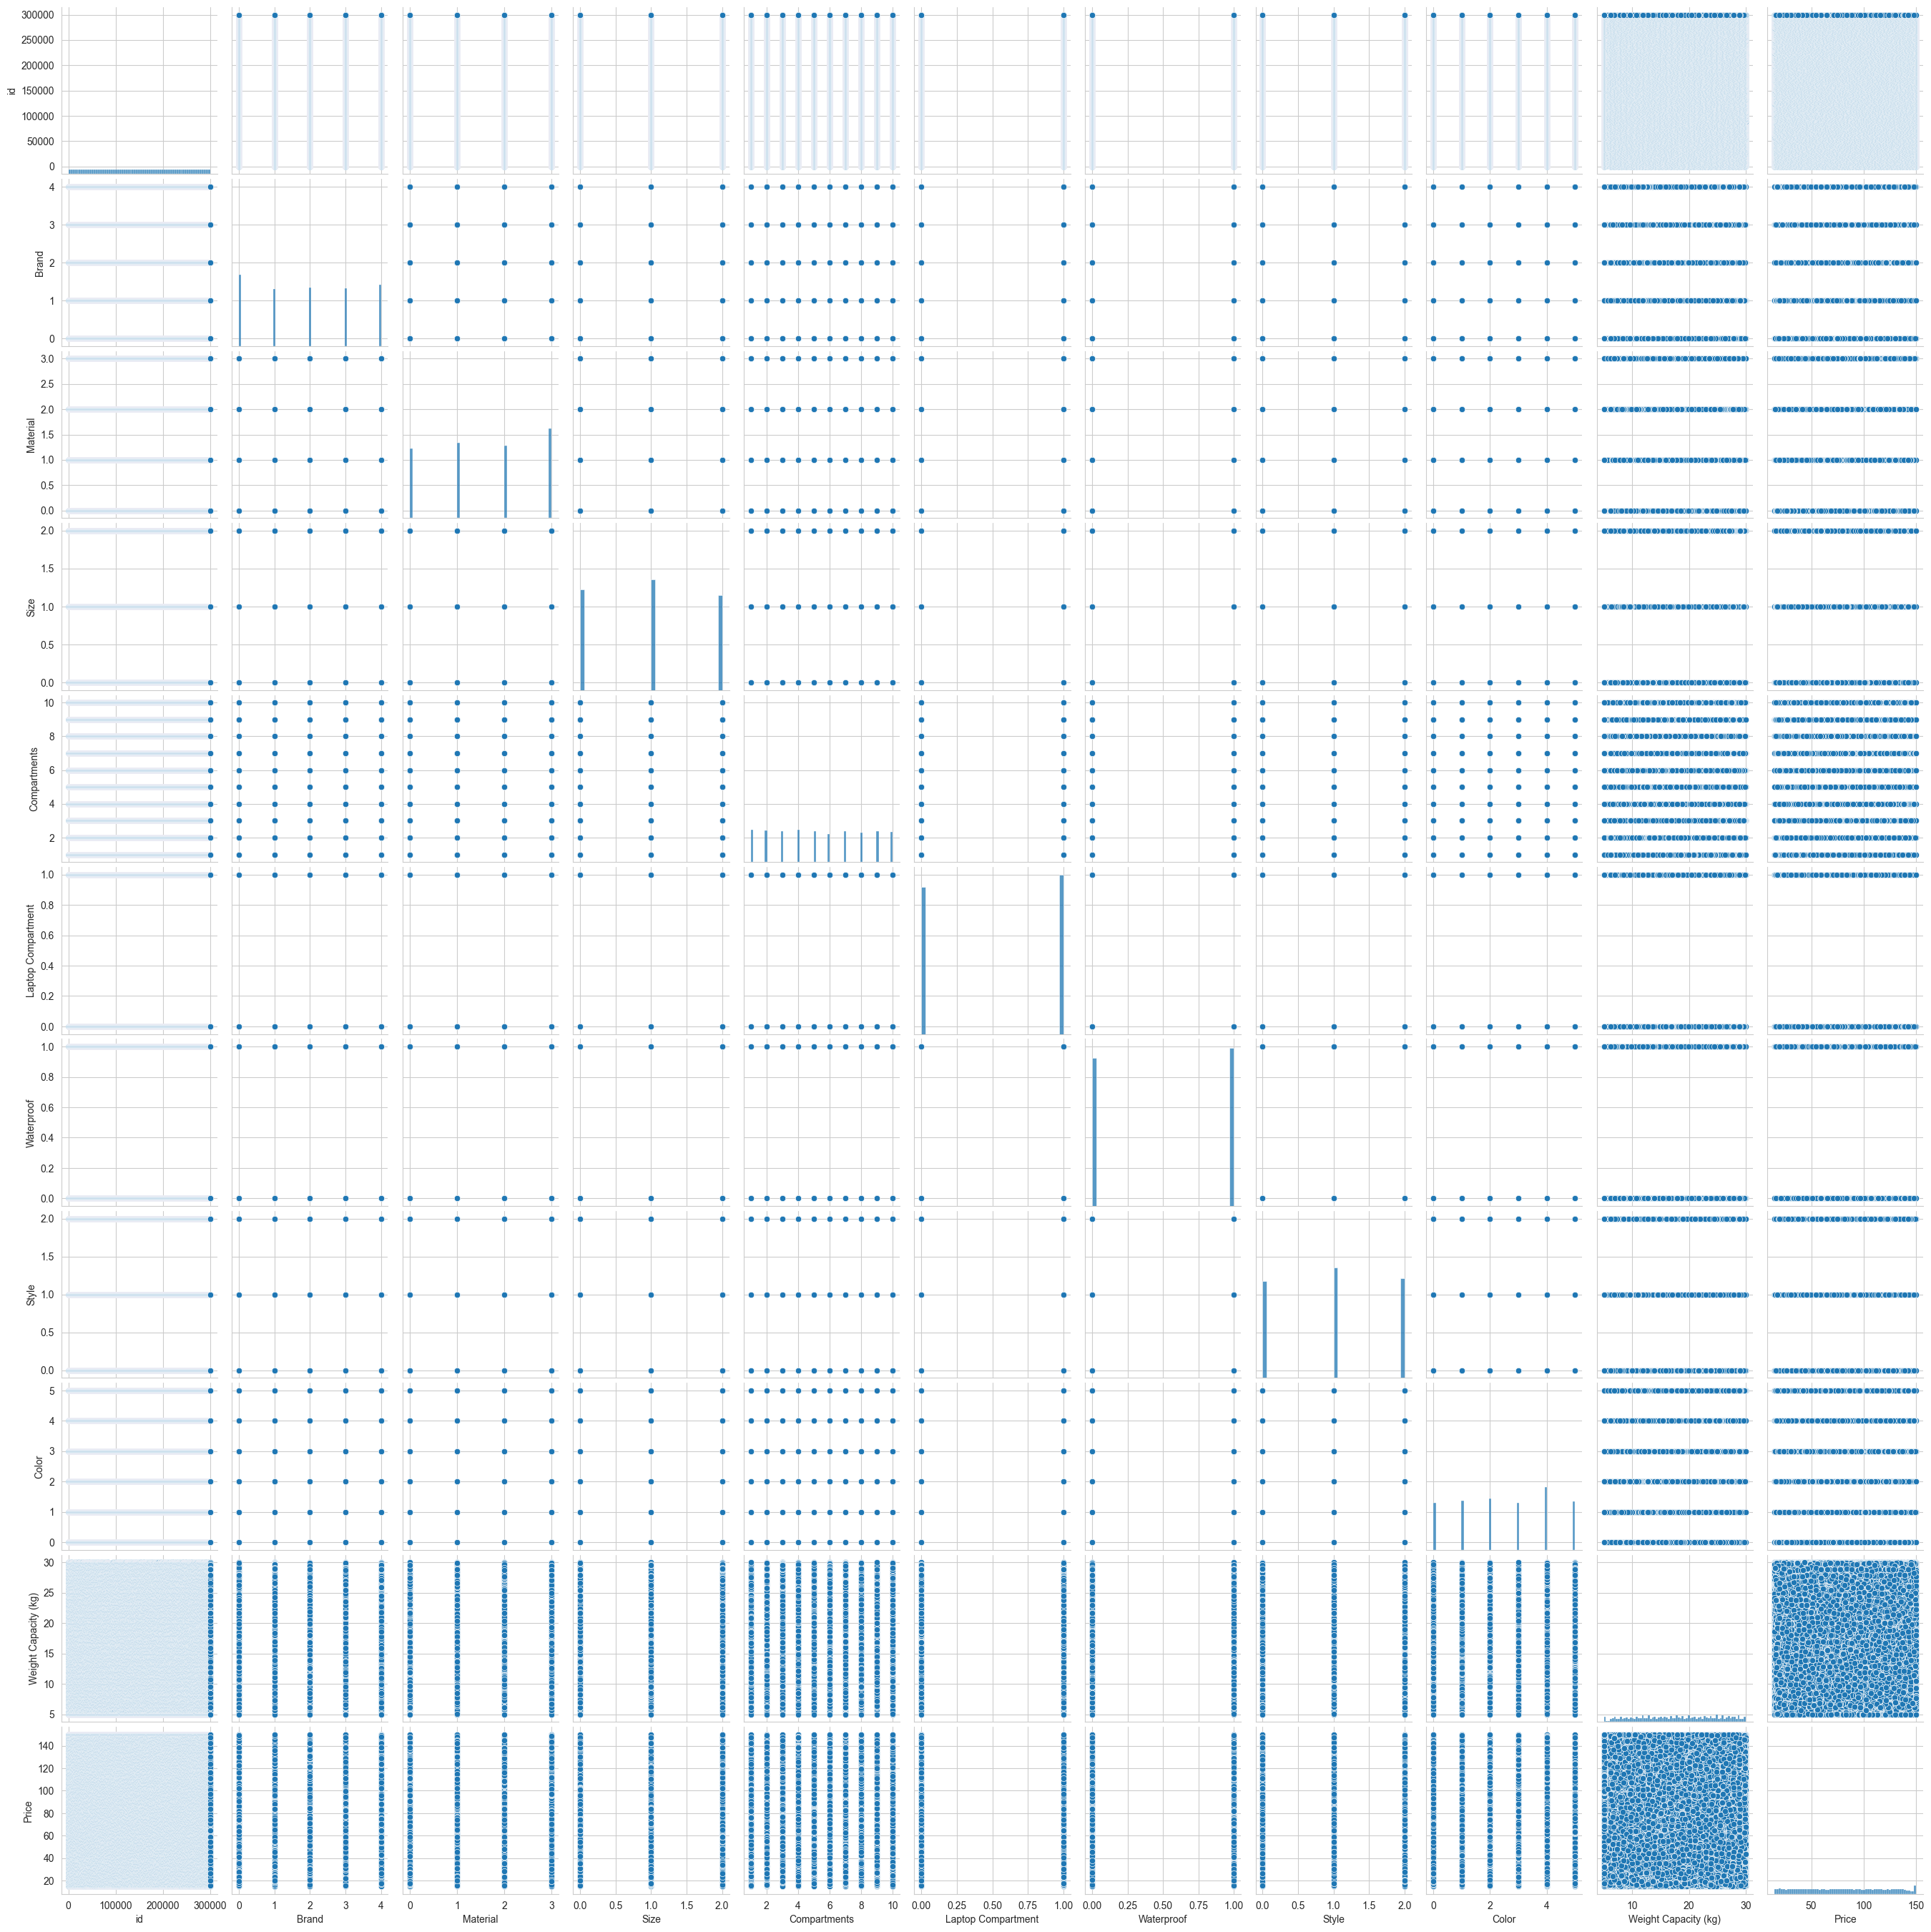

In [30]:
sns.pairplot(train_df)
plt.show()

#### 6.2 Correlation Matrix after encoding

In [31]:
# Compute correlations between numerical features and the target variable
correlation_matrix = train_df.corr()
correlation_matrix

id     Brand  Material      Size  Compartments  \
id                    1.000000  0.002335 -0.002746 -0.000293      0.000982   
Brand                 0.002335  1.000000  0.002290 -0.000050     -0.003434   
Material             -0.002746  0.002290  1.000000  0.001340     -0.001524   
Size                 -0.000293 -0.000050  0.001340  1.000000     -0.005805   
Compartments          0.000982 -0.003434 -0.001524 -0.005805      1.000000   
Laptop Compartment    0.000805  0.003356  0.005464 -0.000133     -0.003252   
Waterproof           -0.001316  0.002558  0.000666  0.000621     -0.004778   
Style                 0.003703  0.000614  0.001678 -0.004442      0.007299   
Color                 0.000697 -0.002596  0.002768  0.002755     -0.001850   
Weight Capacity (kg) -0.001015  0.001593  0.007525 -0.001659      0.002540   
Price                 0.002027  0.008998  0.002136 -0.002400     -0.000131   

                      Laptop Compartment  Waterproof     Style     Color  \
id                              0.000805   -0.001316  0.003703  0.000697   
Brand                           0.003356    0.002558  0.000614 -0.002596   
Material                        0.005464    0.000666  0.001678  0.002768   
Size                           -0.000133    0.000621 -0.004442  0.002755   
Compartments                   -0.003252   -0.004778  0.007299 -0.001850   
Laptop Compartment              1.000000   -0.027695  0.000175  0.000724   
Waterproof                     -0.027695    1.000000 -0.000381 -0.001128   
Style                           0.000175   -0.000381  1.000000 -0.000145   
Color                           0.000724   -0.001128 -0.000145  1.000000   
Weight Capacity (kg)            0.003612    0.004569  0.001800 -0.000379   
Price                          -0.001321   -0.003984 -0.000290  0.003688   

                      Weight Capacity (kg)     Price  
id                               -0.001015  0.002027  
Brand                             0.001593  0.008998  
Material                          0.007525  0.002136  
Size                             -0.001659 -0.002400  
Compartments                      0.002540 -0.000131  
Laptop Compartment                0.003612 -0.001321  
Waterproof                        0.004569 -0.003984  
Style                             0.001800 -0.000290  
Color                            -0.000379  0.003688  
Weight Capacity (kg)              1.000000  0.018011  
Price                             0.018011  1.000000

In [32]:
# Correlation of numerical features with the target variable
print("Correlation with Price:")
display(correlation_matrix['Price'].sort_values(ascending=False))

Correlation with Price:


Price                   1.000000
Weight Capacity (kg)    0.018011
Brand                   0.008998
Color                   0.003688
Material                0.002136
id                      0.002027
Compartments           -0.000131
Style                  -0.000290
Laptop Compartment     -0.001321
Size                   -0.002400
Waterproof             -0.003984
Name: Price, dtype: float64

#### Post-Encoding Observations
- The pairplot of encoded variables highlights separability but no dominant feature correlation with Price.
- Encoded categorical variables appear to capture some variance in the dataset.

#### Key Insights
##### Categorical Features Drive Pricing
- Features like Brand and Material likely contribute more to Price variability compared to numerical features.

##### Neutral Colors Dominate
- Gray, Black, and Blue are the most common colors, indicating consumer preferences.

##### Minimal Linear Relationships
- Limited linear correlation between numerical features and Price emphasizes the need for nonlinear models.

#### Recommendations for Model Building
##### Feature Engineering
- Combine features like Brand and Material to create interaction terms.
- Explore feature extraction for high-cardinality variables like Color.

##### Model Choice
- Use nonlinear models (e.g., XGBoost, LightGBM) to capture feature interactions.

##### Validation Strategy
- Employ cross-validation to ensure robust model evaluation.

##### Further Optimization
- Perform hyperparameter tuning using GridSearchCV or Optuna.
- Assess feature importance to refine the model.

#### 7. Feature Selection & Train-Test Split

In [33]:
# Define features and target
X = train_df.drop(["id", "Price"], axis=1)
y = train_df["Price"]

# Prepare test dataset
X_test = test_df.drop("id", axis=1)

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 8. Train a Baseline XGBoost Model

In [34]:
# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### 9. Model Evaluation

In [35]:
# Predictions on validation set
y_val_pred = xgb_model.predict(X_val)

# Compute RMSE
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 38.9589


#### Baseline XGBoost Model
##### Initial Results:
- **Validation RMSE**: 38.96
- Indicates scope for further optimization.

In [36]:
# Predict on test data
test_predictions = xgb_model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({"id": test_df["id"], "Price": test_predictions})
submission.to_csv("submission.csv", index=False)

# Display first few rows of submission file
submission.head()

id      Price
0  300000  80.830391
1  300001  80.781464
2  300002  84.549332
3  300003  79.575500
4  300004  75.711067

In [37]:
# # Create new features if necessary (example: total compartments)
# train_df['Total_Compartments'] = train_df['Compartments'] + train_df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
# test_df['Total_Compartments'] = test_df['Compartments'] + test_df['Laptop Compartment'].map({'Yes': 1, 'No': 0})

# # Check the new feature
# print("New Feature - Total Compartments:")
# display(train_df[['Compartments', 'Laptop Compartment', 'Total_Compartments']].head())

This notebook demonstrates a comprehensive approach to data exploration and preprocessing for price prediction:

1. **Thorough EDA**:
   - Univariate, bivariate, and correlation analyses provided a clear understanding of the dataset's structure and potential predictors.

2. **Preprocessing**:
   - Missing values were handled appropriately, and categorical features were encoded to prepare the dataset for machine learning.

3. **Model Development**:
   - A baseline XGBoost model achieved an RMSE of 38.96, offering a solid foundation for further optimization through feature engineering and hyperparameter tuning.

##### Next Steps:
1. Tune hyperparameters for boosting models.
2. Experiment with engineered features to improve predictions.
3. Evaluate feature importance and fine-tune based on results.